# Deep Learning Notebook of project Building-Perceptron

## Introduction (must be done in english)

## Imports

In [199]:
# run pipreqs --force in notebook for imports outside of

In [200]:
# !pip install dataframe_image


In [201]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration
import missingno as msno
# import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

# Feature Selection & Importance & VIF
import shap
shap.initjs()
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split


# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# metrics
from sklearn.metrics import accuracy_score, recall_score
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# saving dataframe as img
import dataframe_image as dfi


import plotly.graph_objects as go

### Custom Imports

In [202]:
from functions import compare_feature_lists
# from Perceptron import visualize_data

### Sns Styles

In [203]:

orange = "#FFA500"
purple = "#800080"
grey = "#808080"

custom_palette = ["#FFA500", "#FF8C00", "#FF5500", "#FF2200", "#800040", "#400080", "#800080", "#808080", "#808080"]

custom_palette_f5 = [
    purple   ,  # purple
    '#3B528B',  # Blue
    orange   ,  #orange
    '#21918C',  # Green
    # '#5DC863',  # Yellow-Green
    grey     ,  #grey
    # '#FDE725'   # Yellow
]

viridis_colors = [
    purple   ,  # Purple
    '#3B528B',  # Blue
    '#21918C',  # Green
    '#5DC863',  # Yellow-Green
    '#FDE725'   # Yellow
]

sns.set_palette(custom_palette)


### Importing Perceptron class

In [204]:
# from Perceptron import Perceptron_v1

### Importing constants

In [205]:
from constants import DATA_PATH

## Data Exploration

### Loading Data

In [206]:
df = pd.read_csv(DATA_PATH, sep=';')
# shuffling df to prepare for eventual data reduction from balancing target
# df = original_df.sample(frac=1).reset_index(drop=True)
df.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate


### Exploratory analysis

#### General checks

In [207]:
df.shape

(4424, 37)

In [208]:
df.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate


In [209]:
df.duplicated().sum()

0

In [210]:
df.dtypes.value_counts().index

Index([int64, float64, object], dtype='object')

In [211]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [212]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [213]:
percentage_missing = df.isnull().sum().sort_values(ascending = False)/df.shape[0]*100
print(f"{percentage_missing[percentage_missing<30].count()} beneficial features")
percentage_missing

37 beneficial features


Marital status                                    0.0
Age at enrollment                                 0.0
Curricular units 1st sem (credited)               0.0
Curricular units 1st sem (enrolled)               0.0
Curricular units 1st sem (evaluations)            0.0
Curricular units 1st sem (approved)               0.0
Curricular units 1st sem (grade)                  0.0
Curricular units 1st sem (without evaluations)    0.0
Curricular units 2nd sem (credited)               0.0
Curricular units 2nd sem (enrolled)               0.0
Curricular units 2nd sem (evaluations)            0.0
Curricular units 2nd sem (approved)               0.0
Curricular units 2nd sem (grade)                  0.0
Curricular units 2nd sem (without evaluations)    0.0
Unemployment rate                                 0.0
Inflation rate                                    0.0
GDP                                               0.0
International                                     0.0
Scholarship holder          

In [214]:
# Get the number of unique values for each column and sort in ascending order
sorted_unique_counts = df.nunique().sort_values(ascending=True)

# Display the result
print(sorted_unique_counts)

Scholarship holder                                  2
International                                       2
Gender                                              2
Tuition fees up to date                             2
Daytime/evening attendance\t                        2
Debtor                                              2
Educational special needs                           2
Displaced                                           2
Target                                              3
Marital status                                      6
Application order                                   8
Inflation rate                                      9
Unemployment rate                                  10
Curricular units 2nd sem (without evaluations)     10
GDP                                                10
Curricular units 1st sem (without evaluations)     11
Previous qualification                             17
Course                                             17
Application mode            

In [215]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [216]:
df[(df["Curricular units 1st sem (enrolled)"] > 0) & (df["Curricular units 2nd sem (enrolled)"] == 0)][["Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (enrolled)"]].head(2)

,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled)


In [217]:
df[(df["Curricular units 2nd sem (enrolled)"] == 0)][["Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (enrolled)"]].head(2)

,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled)
0,0,0
20,0,0


In [218]:
df[df["Curricular units 1st sem (enrolled)"] != df["Curricular units 2nd sem (enrolled)"]][["Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (enrolled)"]].shape[0]

778

In [219]:
#  'Curricular units 2nd sem (without evaluations)',
df['Unemployment rate'].mean()

11.56613924050633

In [220]:
df['Curricular units 2nd sem (without evaluations)'].value_counts()

Curricular units 2nd sem (without evaluations)
0     4142
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: count, dtype: int64

In [221]:
df[(df["Curricular units 1st sem (enrolled)"] > 0) & (df["Curricular units 2nd sem (enrolled)"] == 0)][["Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (enrolled)"]].head(2)

,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled)


#### Objects

In [222]:
df.select_dtypes(include=['object']).info() # object int64 float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  4424 non-null   object
dtypes: object(1)
memory usage: 34.7+ KB


#### Int64

In [223]:
df.select_dtypes(include=['int64']).info() # object int64 float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Marital status                                  4424 non-null   int64
 1   Application mode                                4424 non-null   int64
 2   Application order                               4424 non-null   int64
 3   Course                                          4424 non-null   int64
 4   Daytime/evening attendance	                     4424 non-null   int64
 5   Previous qualification                          4424 non-null   int64
 6   Nacionality                                     4424 non-null   int64
 7   Mother's qualification                          4424 non-null   int64
 8   Father's qualification                          4424 non-null   int64
 9   Mother's occupation                             4424 non-null  

#### Float64

In [224]:
df.select_dtypes(include=['float64']).info() # object int64 float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Previous qualification (grade)    4424 non-null   float64
 1   Admission grade                   4424 non-null   float64
 2   Curricular units 1st sem (grade)  4424 non-null   float64
 3   Curricular units 2nd sem (grade)  4424 non-null   float64
 4   Unemployment rate                 4424 non-null   float64
 5   Inflation rate                    4424 non-null   float64
 6   GDP                               4424 non-null   float64
dtypes: float64(7)
memory usage: 242.1 KB


#### Others

In [225]:
df.select_dtypes(exclude=['float64', "int64", "object"]).info() # object int64 float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Empty DataFrame


#### Target & flow

In [226]:
# plt.figure(figsize=(6, 4),)
# sns.countplot(x='yearly_average_grades', hue = df.yearly_average_grades, data=df, palette="Paired")
# plt.title('Distribution of yearly_average_grades')
# plt.show()

Glyph 9 (	) missing from current font.


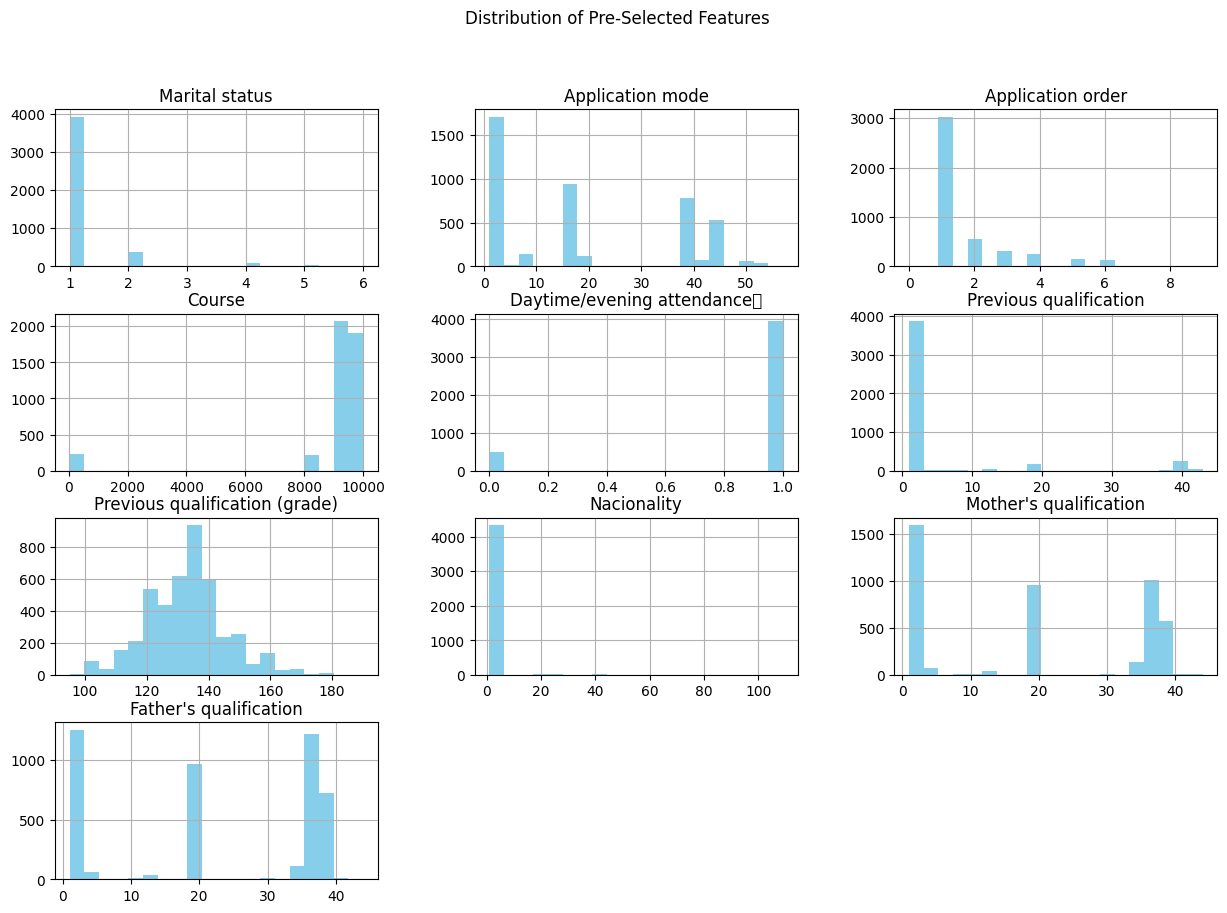

In [227]:
# Plot histograms of the first few features
df.iloc[:, :10].hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution of Pre-Selected Features")
plt.show()


In [228]:
print(df.columns)

# Filter out rows where either 'Curricular units 1st sem (grade)' or 'Curricular units 2nd sem (grade)' is equal to 0
df = df[(df['Curricular units 1st sem (grade)'] != 0) & (df['Curricular units 2nd sem (grade)'] != 0)]

# Calculate the yearly average grade
df["yearly_average_grades"] = df[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean(axis=1)

df.drop(columns=['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'], inplace=True)

# Print the mean of the yearly average grade
print(df["yearly_average_grades"].mean())

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [229]:
# mean_features = [col for col in df.columns if 'mean' in col]
# print(mean_features)
# plt.figure(figsize=(20, 15))
# for i, feature in enumerate(mean_features):
#     plt.subplot(3, 4, i+1)
#     sns.boxplot(hue='yearly_average_grades', y=feature, data=df, palette='Paired')
#     plt.title(f'{feature} vs yearly_average_grades')
# plt.tight_layout()
# plt.show()

In [230]:
# # Distribution des autres colonnes ( autres que ceux contenant mean)
# other_features = [col for col in df.columns if 'mean' not in col and col != "yearly_average_grades"]


# num_features = len(other_features)
# num_cols = 4
# num_rows = (num_features + num_cols - 1) // num_cols

# plt.figure(figsize=(20, 4 * num_rows))

# # Boxplot de xhaque variable
# for i, feature in enumerate(other_features):
#     plt.subplot(num_rows, num_cols, i+1)
#     sns.boxplot(hue='yearly_average_grades', y=feature, data=df, palette='Paired')
#     plt.title(f'{feature} vs yearly_average_grades')

# plt.tight_layout()
# plt.show()


Glyph 9 (	) missing from current font.
Glyph 9 (	) missing from current font.


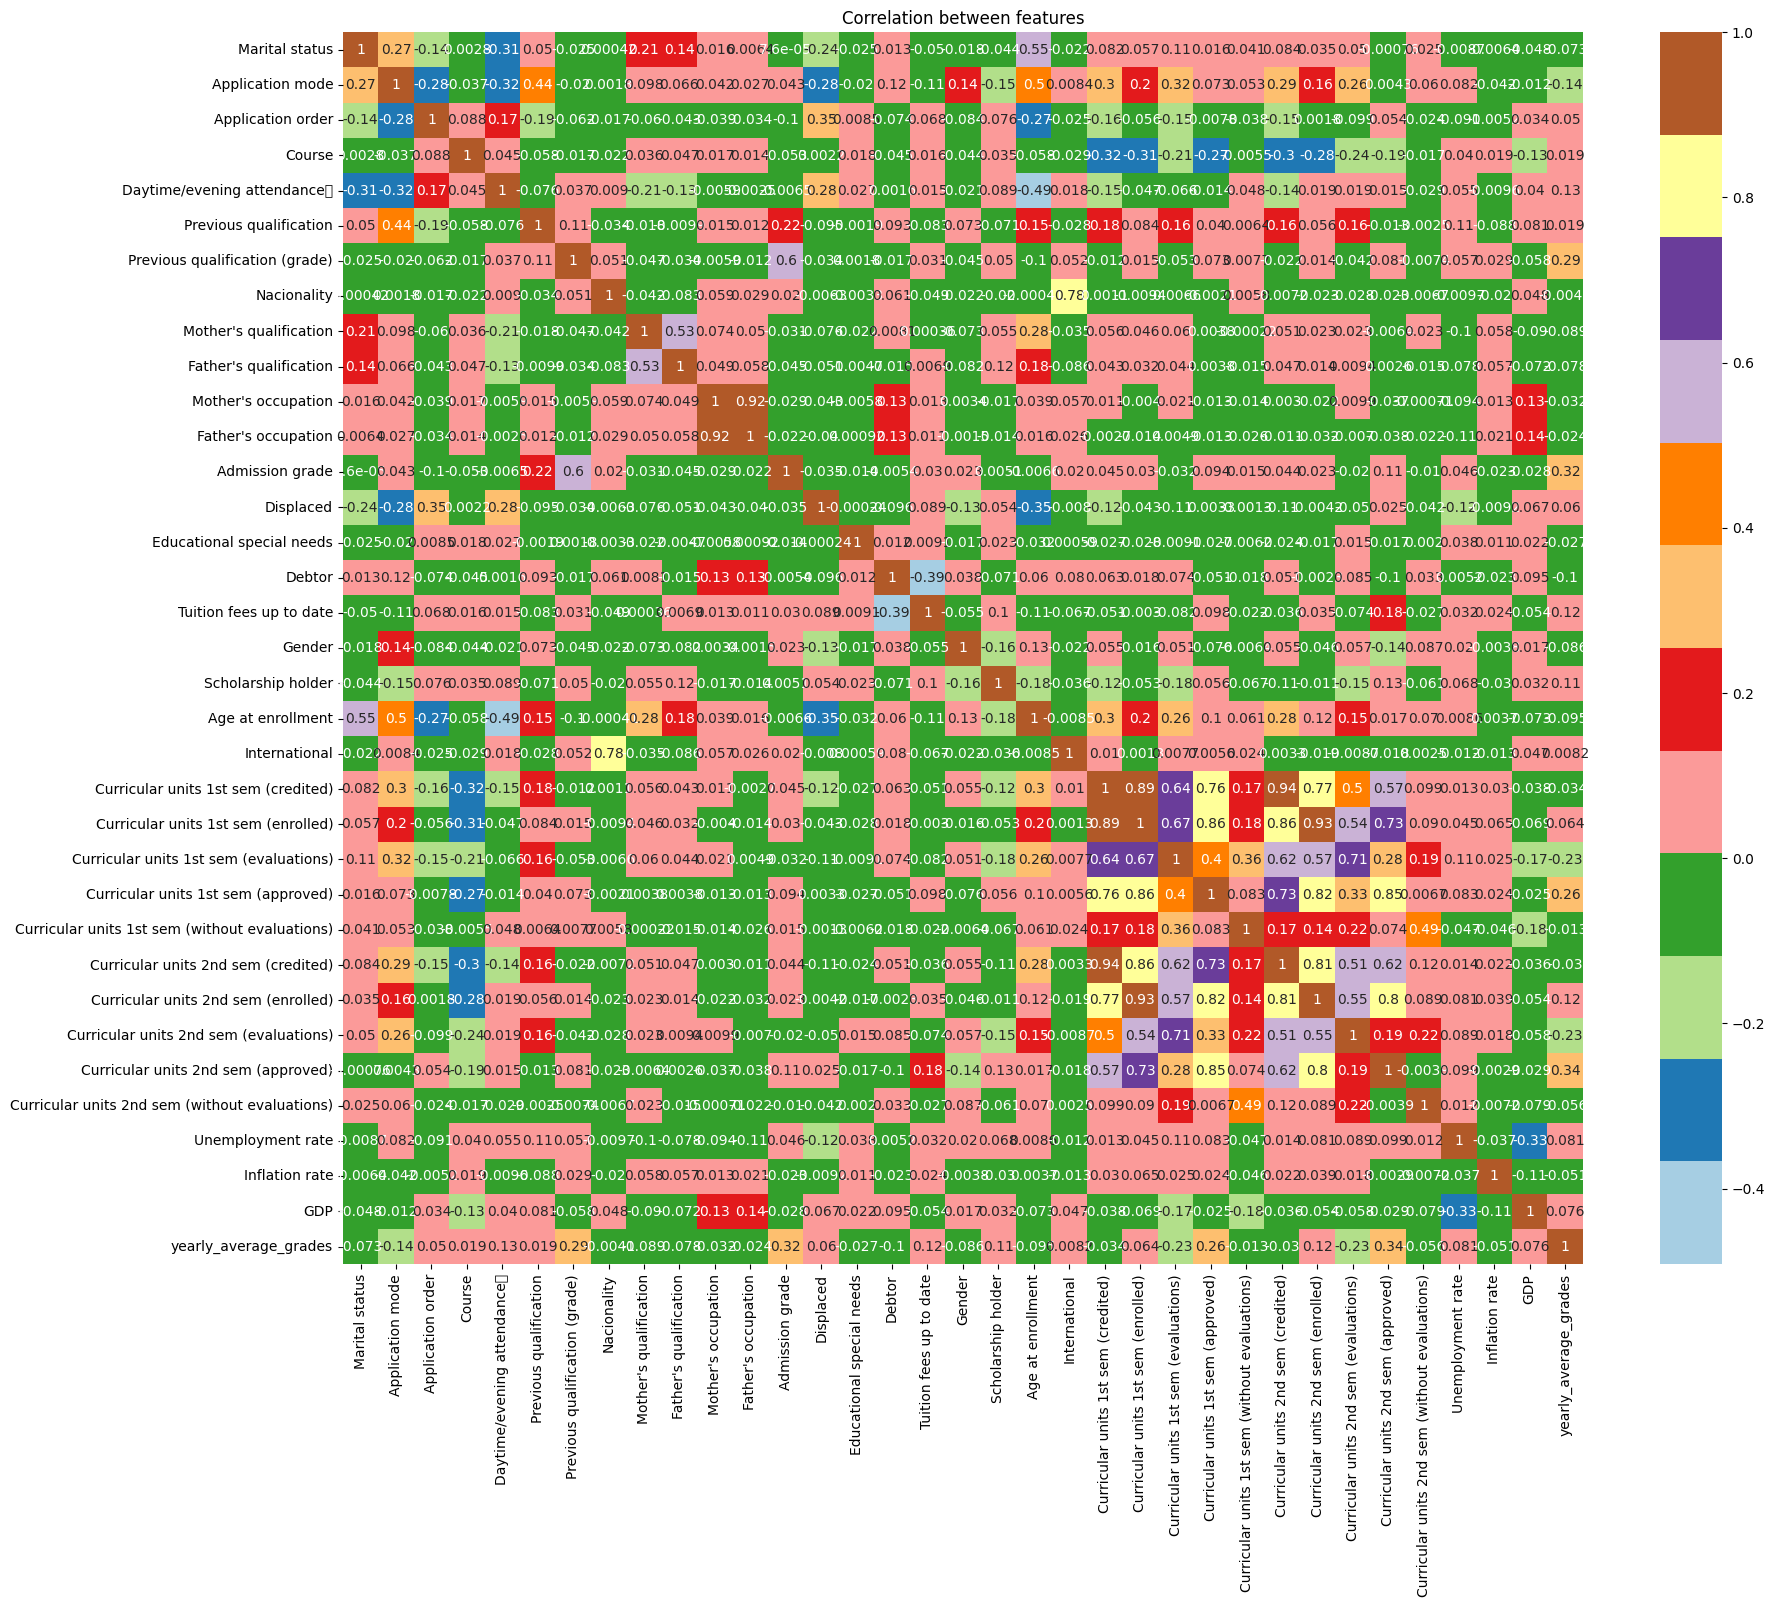

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
plt.figure(figsize=(20, 16))
corr_matrix = sns.heatmap(numeric_df.corr(), annot=True, cmap='Paired')
plt.title('Correlation between features')
plt.show()


In [232]:
# Ce sera réalisé plus tard mais on le conserve ici également.

# # Top 10 des variables les plus influentes
features_correlated = numeric_df.corr()['yearly_average_grades'].abs().sort_values(ascending=False)
# excluding yearly_average_grades
print(features_correlated.index[1:11])
features_correlated

Index(['Curricular units 2nd sem (approved)', 'Admission grade',
       'Previous qualification (grade)', 'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 2nd sem (evaluations)', 'Application mode',
       'Daytime/evening attendance\t', 'Tuition fees up to date',
       'Curricular units 2nd sem (enrolled)'],
      dtype='object')


yearly_average_grades                             1.000000
Curricular units 2nd sem (approved)               0.335552
Admission grade                                   0.320239
Previous qualification (grade)                    0.285575
Curricular units 1st sem (approved)               0.255319
Curricular units 1st sem (evaluations)            0.229844
Curricular units 2nd sem (evaluations)            0.227514
Application mode                                  0.136985
Daytime/evening attendance\t                      0.126101
Tuition fees up to date                           0.123779
Curricular units 2nd sem (enrolled)               0.116821
Scholarship holder                                0.107461
Debtor                                            0.104827
Age at enrollment                                 0.094665
Mother's qualification                            0.088600
Gender                                            0.085824
Unemployment rate                                 0.0810

### Data Cleaning

S'agissant de données médicales, sans l'avis d'un expert, nous ne nous permettons pas d'exclure des données, consulter un tel expert nous permettrait d'avoir une vision plus claire des données dispensables.

##### Balancing the target (Undersampling)

As we don't operate oversampling on medical data, we'll have to undersample the data

yearly_average_grades is already converted to binary at this point.

## Isolating changes made for future pipeline

In [233]:
# don't forget to do the balancing and every other operations after it again.

## Preparing for Deep Learning

### Feature Selection / Dimensionality Reduction

#### Convolution Matrix feature importance

In [234]:
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Get the correlation values with the target variable 'yearly_average_grades'
correlation_with_target = correlation_matrix["yearly_average_grades"].abs().sort_values(ascending=False)

# Select features with high correlation with the target variable
# Here, we choose a threshold of 0.5 for high correlation, but you can adjust this value
high_correlation_features = correlation_with_target[correlation_with_target > 0.5].index.tolist()

# Remove the target variable from the list of selected features
high_correlation_features.remove("yearly_average_grades")

print("Selected features based on correlation with target variable:")
print("retained features:",high_correlation_features)

# Highlight features not retained
all_features = numeric_df.columns.tolist()
not_retained_features = list(set(all_features) - set(high_correlation_features) - {"yearly_average_grades"})

print("\nFeatures not retained based on correlation with target variable:")
print("not retained features:", not_retained_features)

Selected features based on correlation with target variable:
retained features: []

Features not retained based on correlation with target variable:
not retained features: ['Inflation rate', 'GDP', 'Previous qualification', 'Previous qualification (grade)', "Father's qualification", 'Scholarship holder', 'Curricular units 1st sem (approved)', 'Tuition fees up to date', 'Curricular units 2nd sem (enrolled)', 'Curricular units 1st sem (without evaluations)', 'Course', 'Unemployment rate', 'Age at enrollment', 'Debtor', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (enrolled)', "Father's occupation", 'Curricular units 2nd sem (approved)', "Mother's occupation", 'Curricular units 2nd sem (without evaluations)', 'Application order', 'Educational special needs', "Mother's qualification", 'International', 'Application mode', 'Displaced', 'Curricular units 1st sem (credited)', 'Marital status', 'Curricular units 2nd sem (evaluations)', 'Gender', 'Curricular units 2nd sem 

#### Experimentation: Shap Feature Importance on a basic Random Forest for reference

This is just used as a mean to compare with our feature selection algorythms to identify some values we may have missed out on.
It is not used in our following Feature selection

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
X = df.drop("yearly_average_grades", axis=1)
y = df["yearly_average_grades"]

# Convert categorical columns to numeric using Label Encoding or One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)  # Use one-hot encoding for categorical features

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=1)

# Train the regression model
clf = RandomForestRegressor(random_state=1)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.8888449768888796
Mean Absolute Error: 0.73455530849665
R² Score: 0.40826166231139616


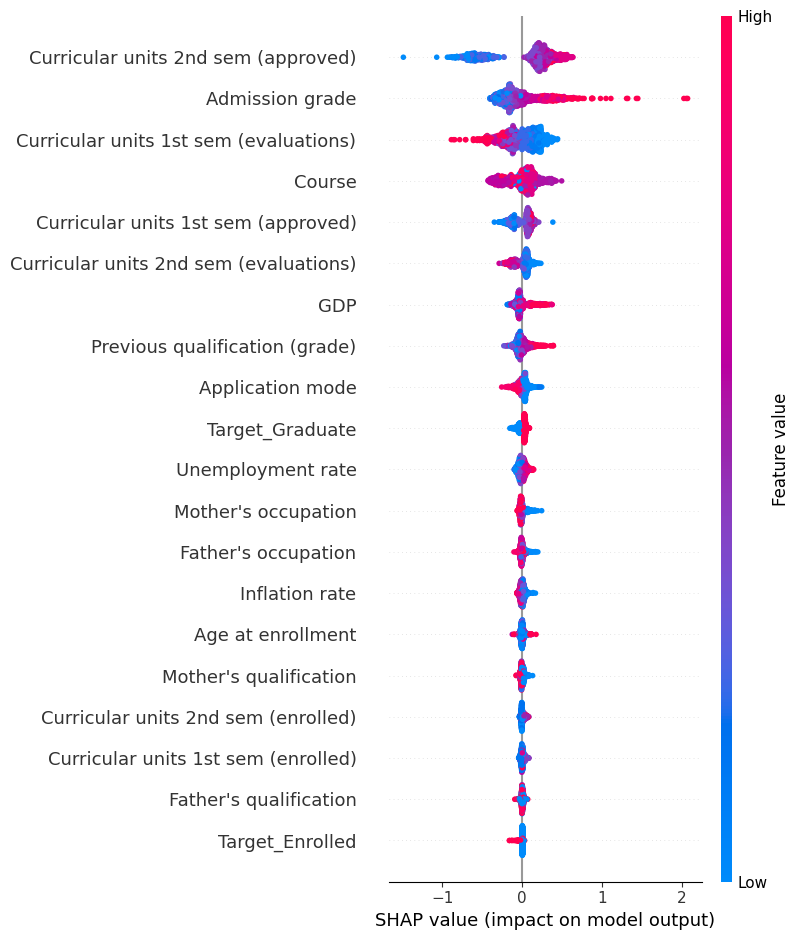

In [238]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# shap.summary_plot(shap_values[0], X_test)
# shap.dependence_plot("radius_worst", shap_values[0], X_test,interaction_index="perimeter_worst")
# shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)
# shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :],matplotlib = True)
# impact_scores = np.abs(shap_values[1]).sum(axis=1)
# most_impactful_index = np.argmax(impact_scores)  # Gives the index of the most impactful sample
# impact_scores

In [241]:
import numpy as np

# Sum of absolute SHAP values across all samples for each feature
feature_impact_scores = np.abs(shap_values.values).sum(axis=0)

# Creating a dictionary with feature names and their associated impact scores
impact_scores_dict = dict(zip(X_test.columns, feature_impact_scores))

# Sorting the dictionary by values (impact scores) in descending order
sorted_impact_scores_dict = dict(sorted(impact_scores_dict.items(), key=lambda item: item[1], reverse=True))

# Printing the sorted impact scores
print(sorted_impact_scores_dict)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

#### Boruta

In [250]:
# Boruta is not up to date with the latests versions of numpy so we need to do this to fix the int error
np.int = np.int32
np.float = np.float64
np.bool = np.bool_


# Get the names of the features
features_names = X_encoded.columns

rf = RandomForestRegressor(n_estimators=200, n_jobs=-1, max_depth=5)

feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)

# find all relevant features
feat_selector.fit(X_encoded, df.yearly_average_grades.values)

# check selected features
print(feat_selector.support_)


# check ranking of features
print(feat_selector.ranking_)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	7
Rejected: 	22
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	7
Rejected: 	22
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	7
Rejected: 	22
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	7
Rejected: 	22
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	22
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	22
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	22
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	22
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	5
Rejected: 	23
I

In [249]:
X_encoded.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment 

In [251]:
feat_selector.support_

array([False,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True,  True, False, False, False,  True, False,  True])

In [252]:
# Map the boolean array to feature names
boruta_selected_features = features_names[feat_selector.support_]

# Convert to a list (if needed)
boruta_selected_features_list = boruta_selected_features.tolist()
boruta_selected_features_list

['Application mode',
 'Course',
 'Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'GDP',
 'Target_Graduate']

Glyph 9 (	) missing from current font.


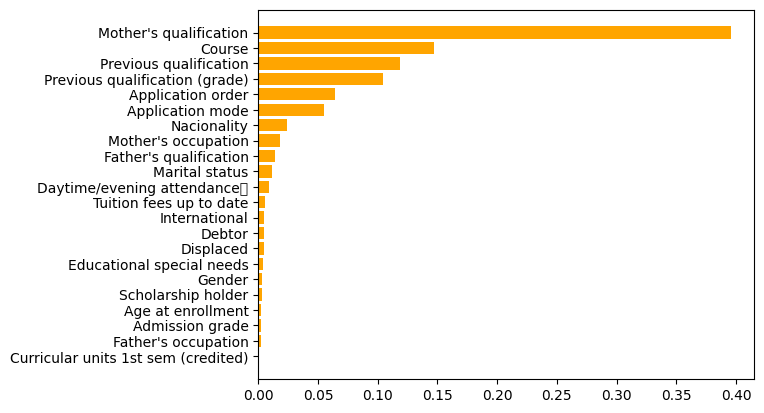

In [253]:
from sklearn.feature_selection import RFECV

f_i = list(zip(features_names,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()


In [254]:
rfe = RFECV(estimator=rf, cv=5, scoring="neg_mean_squared_error", verbose=1, importance_getter='auto')
rfe.fit(X_train, y_train)


Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 fea

RFECV(cv=5,
      estimator=RandomForestRegressor(max_depth=5, n_estimators=93, n_jobs=-1,
                                      random_state=RandomState(MT19937) at 0x7FAC33BD0940),
      scoring='neg_mean_squared_error', verbose=1)

In [255]:
# Get the ranking of features
feature_ranking = rfe.ranking_

# Normalize the ranking to a scale from 0 to 1
normalized_ranking = (feature_ranking - feature_ranking.min()) / (feature_ranking.max() - feature_ranking.min())

# Create a DataFrame to display the feature names and their normalized ranking
feature_importance_df = pd.DataFrame({
    'Feature': features_names,
    'Normalized Ranking': normalized_ranking
})

print(feature_importance_df)

                                           Feature  Normalized Ranking
0                                   Marital status            0.611111
1                                 Application mode            0.000000
2                                Application order            0.722222
3                                           Course            0.000000
4                     Daytime/evening attendance\t            0.277778
5                           Previous qualification            0.000000
6                   Previous qualification (grade)            0.000000
7                                      Nacionality            0.666667
8                           Mother's qualification            0.222222
9                           Father's qualification            0.111111
10                             Mother's occupation            0.000000
11                             Father's occupation            0.000000
12                                 Admission grade            0.000000
13    

In [259]:
rf_selected_features = np.array(features_names)[rfe.get_support()]
print(rf_selected_features)

# Get the ranking of features
feature_ranking = rfe.ranking_

# Normalize the ranking to a scale from 0 to 1
normalized_ranking = (1 - (feature_ranking - feature_ranking.min()) / (feature_ranking.max() - feature_ranking.min()))*5
# normalized_ranking = (feature_ranking - feature_ranking.min()) / (feature_ranking.max() - feature_ranking.min())


# Create a DataFrame to display the feature names and their normalized ranking
feature_importance_df = pd.DataFrame({
    'Feature': features_names,
    'Normalized_Ranking': normalized_ranking
})

# Filter the DataFrame to only keep features in rf_selected_features
filtered_df = feature_importance_df[feature_importance_df['Feature'].isin(rf_selected_features)]

# Update the Normalized_Ranking column with the corresponding values from normalized_ranking
filtered_df['Normalized_Ranking'] = filtered_df['Feature'].apply(lambda x: normalized_ranking[features_names.get_loc(x)])

print(filtered_df)


['Application mode' 'Course' 'Previous qualification'
 'Previous qualification (grade)' "Mother's occupation"
 "Father's occupation" 'Admission grade' 'Age at enrollment'
 'Curricular units 1st sem (enrolled)'
 'Curricular units 1st sem (evaluations)'
 'Curricular units 1st sem (approved)'
 'Curricular units 2nd sem (enrolled)'
 'Curricular units 2nd sem (evaluations)'
 'Curricular units 2nd sem (approved)' 'Unemployment rate'
 'Inflation rate' 'GDP' 'Target_Graduate']
                                   Feature  Normalized_Ranking
1                         Application mode                 5.0
3                                   Course                 5.0
5                   Previous qualification                 5.0
6           Previous qualification (grade)                 5.0
10                     Mother's occupation                 5.0
11                     Father's occupation                 5.0
12                         Admission grade                 5.0
19                    

/tmp/ipykernel_2568/404184456.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Our choice

We decided to mix 3 different process for now:
- most correlated from the Correlation Matrix 
- Boruta
- Random Forest as a feature selection tool

In [260]:
features_in_common,features_in_atleast_two, unique_features = compare_feature_lists(high_correlation_features, boruta_selected_features, rf_selected_features)
print(features_in_common)
# THEN ADD MATCH WITH corr matrix results

[]


#### Visual Representation of Feature Selection

In [261]:
corr_perf_dict = correlation_with_target[correlation_with_target > 0.5]
corr_perf_dict = (corr_perf_dict / corr_perf_dict.max()) * 5

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r=corr_perf_dict,
    theta=corr_perf_dict.index.tolist(),
    fill='toself',
    name='Corr Matrix',
    line=dict(color='blue')
))

boruta_perf_dict = correlation_with_target[boruta_selected_features_list]
boruta_perf_dict = (boruta_perf_dict / boruta_perf_dict.max()) * 5
boruta_perf_dict = boruta_perf_dict.reindex(features_in_common).dropna()
fig.add_trace(go.Scatterpolar(
    r=boruta_perf_dict,
    theta=boruta_perf_dict.index.tolist(),
    fill='toself',
    name='Boruta',
    line=dict(color='green')
))

# Reorder the DataFrame based on the order of features in correlation_with_target
ordered_features = [feature for feature in correlation_with_target.index if feature in filtered_df['Feature'].values]
filtered_df = filtered_df.set_index('Feature').loc[ordered_features].reset_index()

fig.add_trace(go.Scatterpolar(
    r=filtered_df['Normalized_Ranking'].to_list(),
    theta=filtered_df['Feature'].to_list(),
    # fill='toself',
    name='Random Forest',
    line=dict(color='orange')
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
    visible=True,
    range=[0, 5]
    )),
  showlegend=True
)

fig.show()


KeyError: "['Target_Graduate'] not in index"

### Preprocessing

#### Scaling

In [ ]:
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features_in_common]), columns=features_in_common)
df_scaled['yearly_average_grades'] = df['yearly_average_grades'].values
df_scaled.head()

ValueError: at least one array or dtype is required

#### VIF

In [210]:
df_scaled.head()
# Ideally we'll compare it to a version with another deep with values in top 5 of Shap

,concave points_worst,perimeter_worst,radius_worst,concave points_mean,area_worst,concavity_worst,area_se,diagnosis
0,0.498851,-0.050145,-0.072140,0.479623,-0.054890,0.883220,-0.042857,1
1,0.334341,0.640309,0.730333,0.116030,0.822823,0.241681,0.000885,1
2,0.345954,0.459016,0.451391,0.543391,0.443321,0.262512,0.392541,1
3,0.389500,0.945034,1.057369,0.751638,1.244345,0.127637,1.773831,1
4,1.226563,1.377049,1.112333,0.778808,1.139293,1.549475,1.921997,1


In [1]:
# Split into train and test
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(df_scaled.drop(columns=["yearly_average_grades"]), df_scaled.yearly_average_grades,\
    test_size=0.3, random_state=1)


vif_data = pd.DataFrame()
vif_data["feature"] = list(X_train_vif)
vif_data["VIF"] = [variance_inflation_factor(X_train_vif, i)
                          for i in range(len(X_train_vif.columns))]


print('VIF (facteur d\'inflation de la variance)')
print(vif_data)

NameError: name 'train_test_split' is not defined

In [212]:
# Split into train and test
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(df_scaled.drop(columns=["yearly_average_grades"])\
    .drop(columns=["radius_worst", "concave points_mean", "perimeter_worst"]), df_scaled.yearly_average_grades,\
    test_size=0.3, random_state=1)


vif_data = pd.DataFrame()
vif_data["feature"] = list(X_train_vif)
vif_data["VIF"] = [variance_inflation_factor(X_train_vif, i)
                          for i in range(len(X_train_vif.columns))]

print('VIF (facteur d\'inflation de la variance)')
print(vif_data)

VIF (facteur d'inflation de la variance)
                feature       VIF
0  concave points_worst  5.965959
1            area_worst  5.618359
2       concavity_worst  3.458188
3               area_se  3.212880


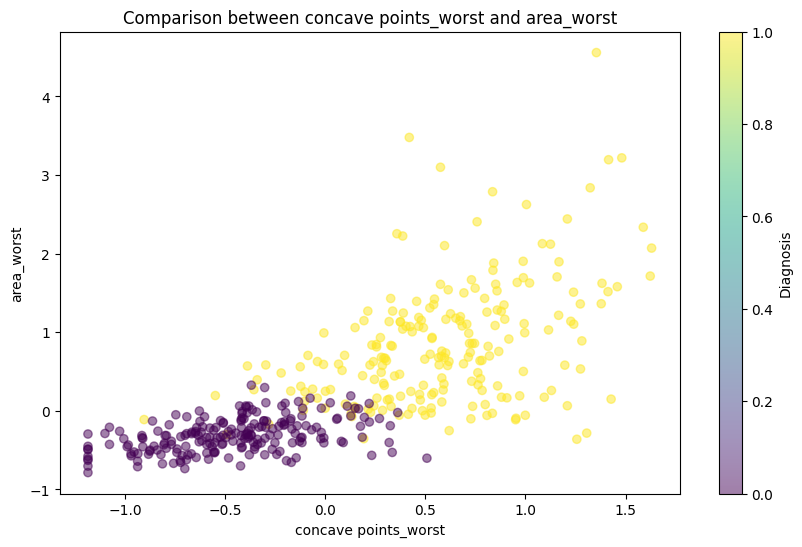

In [213]:
import matplotlib.pyplot as plt

# Scatter plot to compare concave points_worst and area_worst
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled['concave points_worst'], df_scaled['area_worst'], \
    alpha=0.5, c=df_scaled['yearly_average_grades'], cmap='viridis')
plt.title('Comparison between concave points_worst and area_worst')
plt.xlabel('concave points_worst')
plt.ylabel('area_worst')
plt.colorbar(label='yearly_average_grades')
plt.show()

So we indeed see a clear colinearity between the two remaining vars so we'll slightly change the recipe.

In [214]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop(columns=["yearly_average_grades"])\
    .drop(columns=["area_worst", "radius_worst"]), df_scaled.yearly_average_grades,\
    test_size=0.3, random_state=1)


vif_data = pd.DataFrame()
vif_data["feature"] = list(X_train)
vif_data["VIF"] = [variance_inflation_factor(X_train, i)
                          for i in range(len(X_train.columns))]

print('VIF (facteur d\'inflation de la variance)')
print(vif_data)

VIF (facteur d'inflation de la variance)
                feature        VIF
0  concave points_worst  10.467909
1       perimeter_worst   6.303954
2   concave points_mean   8.582749
3       concavity_worst   3.492496
4               area_se   2.906242


### Choosing Metrics

Le ``Recall`` mesure la capacité du modèle à identifier correctement les cas positifs (ici les patients atteint d'une tumeur maligne). Dans un contexte médical, il est essentiel de minimiser les faux négatifs, on va donc s'intéresser également à la ``spécificité`` et au ``NPV``(Negativite Predictive Value)


``Recall`` measures the model's ability to correctly identify positive cases (in this case, patients with a malignant tumor). In a medical context, it is crucial to minimize false negatives. We will also take ``NPV`` (Negative Predictive Value) (healthy patients being correctly classified as healthy) into consideration while keeping the ``specificity``( to avoid a high count of healthy patients being misclassified as sick) as high as possible to ensure we won't accidentally classify too many healthy individuals as sick either.

<img src="data/img/NPV.webp" style="height:100px" />

So We'll focus on recall while taking the other two into consideration

## Modelisation

### Running the perceptron

In [215]:
# Création et entraînement du perceptron
perceptron = Perceptron_v1(num_inputs=X_train.shape[1])
perceptron.train(X_train.values, y_train.values)

# Faire des prédictions sur les données de test
predictions = [perceptron.predict(x) for x in X_test.values]

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = cm.ravel()

# Calcul des métriques
perceptron_recall = TP / (TP + FN)
perceptron_npv = TN / (TN + FN)
perceptron_specificity = TN / (TN + FP)

print(f"Recall: {perceptron_recall:.2f}")
print(f"NPV: {perceptron_npv:.2f}")
print(f"Specificity: {perceptron_specificity:.2f}")

Recall: 0.97
NPV: 0.97
Specificity: 0.84


### Reexecuting the Random Forest Classifier with selected features

In [216]:
# Train a machine learning model using the new selected features
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate NPV and specificity
rf_NPV = TN / (TN + FN)
rf_specificity = TN / (TN + FP)

# Calculate recall
rf_recall = recall_score(y_test, y_pred)

print(f"Recall: {rf_recall}")
print(f"NPV: {rf_NPV}")
print(f"Specificity: {rf_specificity}")

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        64
           1       0.92      0.88      0.90        64

    accuracy                           0.90       128
   macro avg       0.90      0.90      0.90       128
weighted avg       0.90      0.90      0.90       128

Recall: 0.9180327868852459
NPV: 0.921875
Specificity: 0.8805970149253731


### Running a very basic Deep Learning model

In [217]:
df_scaled[features_in_common].dtypes

concave points_worst    float64
perimeter_worst         float64
radius_worst            float64
concave points_mean     float64
area_worst              float64
concavity_worst         float64
area_se                 float64
dtype: object

In [218]:
from keras.layers import Dropout

# Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss for improvement
    patience=50,            # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore model weights from the epoch with the best performance
)


# Define the model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall()])

# Train the model
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int64")
deep_recall = recall_score(y_test, y_pred)
print("Test Recall:", deep_recall)

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Specificity
deep_specificity = tn / (tn + fp)
print(f"Specificity: {deep_specificity}")

# NPV (Negative Predictive Value)
deep_npv = tn / (tn + fn)
print(f"NPV: {deep_npv}")

Epoch 1/2000
10/10 [==============================] - 2s 40ms/step - loss: 0.6314 - recall_1: 0.9139 - val_loss: 0.5750 - val_recall_1: 0.9836
Epoch 2/2000
10/10 [==============================] - 0s 9ms/step - loss: 0.5287 - recall_1: 0.9669 - val_loss: 0.4814 - val_recall_1: 0.9508
Epoch 3/2000
10/10 [==============================] - 0s 8ms/step - loss: 0.4615 - recall_1: 0.9735 - val_loss: 0.4122 - val_recall_1: 0.9344
Epoch 4/2000
10/10 [==============================] - 0s 8ms/step - loss: 0.3842 - recall_1: 0.9735 - val_loss: 0.3524 - val_recall_1: 0.9344
Epoch 5/2000
10/10 [==============================] - 0s 11ms/step - loss: 0.3141 - recall_1: 0.9669 - val_loss: 0.2940 - val_recall_1: 0.9344
Epoch 6/2000
10/10 [==============================] - 0s 8ms/step - loss: 0.2630 - recall_1: 0.9603 - val_loss: 0.2434 - val_recall_1: 0.9180
Epoch 7/2000
10/10 [==============================] - 0s 8ms/step - loss: 0.1877 - recall_1: 0.9338 - val_loss: 0.2199 - val_recall_1: 0.9180
Epoc

In [219]:
!pip freeze > requirements.txt

## Table comparing model results

In [220]:
# Create a dictionary with the metrics
metrics = {
    'Model': ["Perceptron", 'Random Forest', 'Deep Learning'],
    "Recall": [perceptron_recall, rf_recall, deep_recall],
    'NPV': [perceptron_npv, rf_NPV, deep_npv],
    'Specificity': [perceptron_specificity, rf_specificity, deep_specificity]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print(metrics_df)

           Model    Recall       NPV  Specificity
0     Perceptron  0.967213  0.965517     0.835821
1  Random Forest  0.918033  0.921875     0.880597
2  Deep Learning  0.918033  0.923077     0.895522


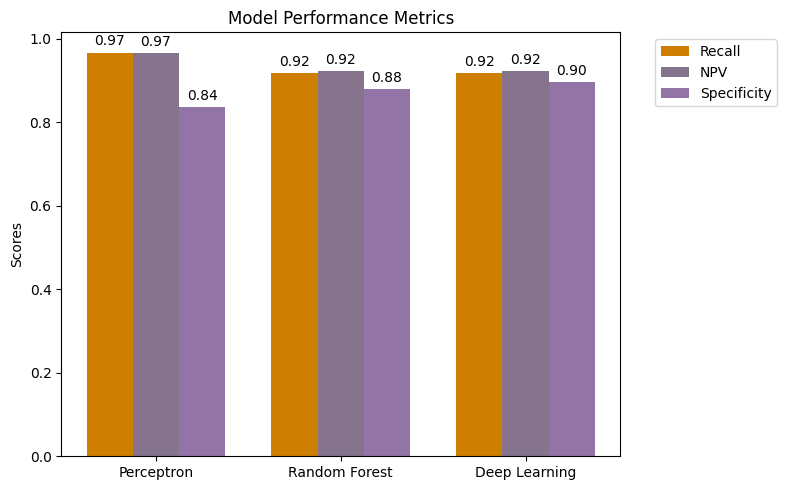

In [221]:
# Data for plotting
models = metrics_df["Model"]
recall = metrics_df["Recall"]
npv = metrics_df["NPV"]
specificity = metrics_df["Specificity"]

# Plot grouped bar chart
x = np.arange(len(models))  # Label locations
width = 0.25  # Width of bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width, recall, width, label="Recall", color="#CE7E00")
rects2 = ax.bar(x, npv, width, label="NPV", color="#85748C")
rects3 = ax.bar(x + width, specificity, width, label="Specificity", color="#9374A6")

# Add labels, title, and legend
ax.set_ylabel("Scores")
ax.set_title("Model Performance Metrics")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value annotations
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Save and show the plot
plt.tight_layout()
plt.savefig("image/result_comparison.png")
plt.show()

## Feature importance of our perceptron

Using 296 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 128/128 [00:18<00:00,  6.85it/s]


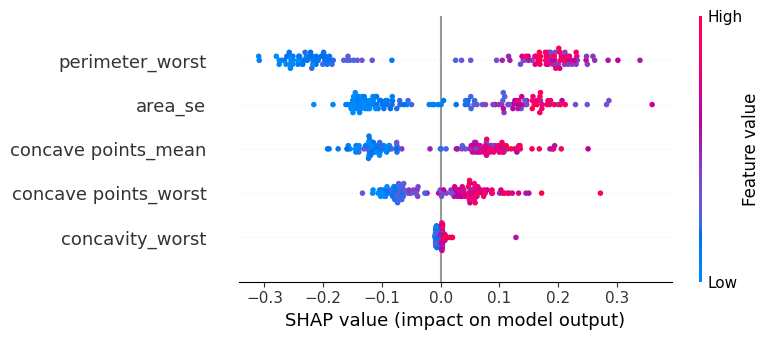

In [222]:
# Wrapper function for SHAP
def perceptron_predict(X):
    return np.array([perceptron.predict(x) for x in X])

# Use SHAP with the perceptron model
explainer = shap.KernelExplainer(perceptron_predict, X_train)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

## Conclusion

``Concluez sur l’efficacité d’un Perceptron sur ce type de problématique
puis, proposez des solutions sans les implémenter.``

Comme on pouvait s'y attendre, les performances d'un perceptron unique sont inferieur à celle d'un modèle basique de Machine Learning/Deep Learning, on remarque cependant que vu sa "simplicité" les résultats atteint dépassent tout de même la basiline et semble assez correcte.

petit passage comme quoi notre perceptron est nul et c'est en explorant d'autres stratégies comme le backtracking qu'on attendra de très bon résultat

Il n'en reste pas moins que la technologie employée est limitée, et en implémentant des méthodes de backtracking et rétropogatation nous attendons des résultats plus probant bien que n'atteignant pas la performance des modèles de ml & Deep Learning reconnus.